## Exploratory Data Analysis (EDA) for Netflix Subscriber Churn Prediction

In [1]:
#Important needed libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')


# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

# We are using whitegrid style for our seaborn plots. This is like the most basic one
sns.set_style(style = 'whitegrid')

In [ ]:
#Load dataset 
netflix_data = pd.read_csv("../data/netflix_raw.csv")

### Initial Data Inspection

The goal of this step is to understand the structure, scale, and basic attributes of the dataset before performing any cleaning or analysis.

In [3]:
#Print first few rows of dataset then see # of rows & columns in entire dataset.
print(netflix_data.head())
print("-------------------------------------------------------------------------------------------")
print("Number of rows, columns: ") 
print(netflix_data.shape)

                            customer_id  age  gender subscription_type  \
0  a9b75100-82a8-427a-a208-72f24052884a   51   Other             Basic   
1  49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b   47   Other          Standard   
2  4d71f6ce-fca9-4ff7-8afa-197ac24de14b   27  Female          Standard   
3  d3c72c38-631b-4f9e-8a0e-de103cad1a7d   53   Other           Premium   
4  4e265c34-103a-4dbb-9553-76c9aa47e946   56   Other          Standard   

   watch_hours  last_login_days   region  device  monthly_fee  churned  \
0        14.73               29   Africa      TV         8.99        1   
1         0.70               19   Europe  Mobile        13.99        1   
2        16.32               10     Asia      TV        13.99        0   
3         4.51               12  Oceania      TV        17.99        1   
4         1.89               13   Africa  Mobile        13.99        1   

  payment_method  number_of_profiles  avg_watch_time_per_day favorite_genre  
0      Gift Card                

In [4]:
# Generate summary statistics on numerical variables 
print(netflix_data.describe())
print("-------------------------------------------------------------------------------------------")
print(netflix_data.info())

               age  watch_hours  last_login_days  monthly_fee      churned  \
count  5000.000000  5000.000000      5000.000000  5000.000000  5000.000000   
mean     43.847400    11.649450        30.089800    13.683400     0.503000   
std      15.501128    12.014654        17.536078     3.692062     0.500041   
min      18.000000     0.010000         0.000000     8.990000     0.000000   
25%      30.000000     3.337500        15.000000     8.990000     0.000000   
50%      44.000000     8.000000        30.000000    13.990000     1.000000   
75%      58.000000    16.030000        45.000000    17.990000     1.000000   
max      70.000000   110.400000        60.000000    17.990000     1.000000   

       number_of_profiles  avg_watch_time_per_day  
count         5000.000000             5000.000000  
mean             3.024400                0.874800  
std              1.415841                2.619824  
min              1.000000                0.000000  
25%              2.000000            

## Observations 

- The dataset contains ~5,000 records with an even split of numeric and categorical features
- No missing values are present in the core numeric fields.
- The target variable (`churned`) is binary, suggesting a classification problem.
- Several categorical variables (e.g., subscription_type, device, region) will require encoding.

In [5]:
## Categorical Variable EDA
df_categorical_only = netflix_data.select_dtypes(include = 'object').copy()

cat_stats = pd.DataFrame(columns=["col_name","col_category_name","num_unique_values"])

rows=[]
for c in df_categorical_only.columns: 
    rows.append({         
        "col_name": c,
        "col_category_name": df_categorical_only[c].unique(),
        "num_unique_values": df_categorical_only[c].nunique()
    })

cat_stats = pd.DataFrame(rows)
cat_stats = cat_stats.iloc[1:]
print(cat_stats.head())

            col_name                                  col_category_name  \
1             gender                              [Other, Female, Male]   
2  subscription_type                         [Basic, Standard, Premium]   
3             region  [Africa, Europe, Asia, Oceania, South America,...   
4             device              [TV, Mobile, Laptop, Desktop, Tablet]   
5     payment_method  [Gift Card, Crypto, Debit Card, PayPal, Credit...   

   num_unique_values  
1                  3  
2                  3  
3                  6  
4                  5  
5                  5  


<Axes: xlabel='favorite_genre', ylabel='count'>

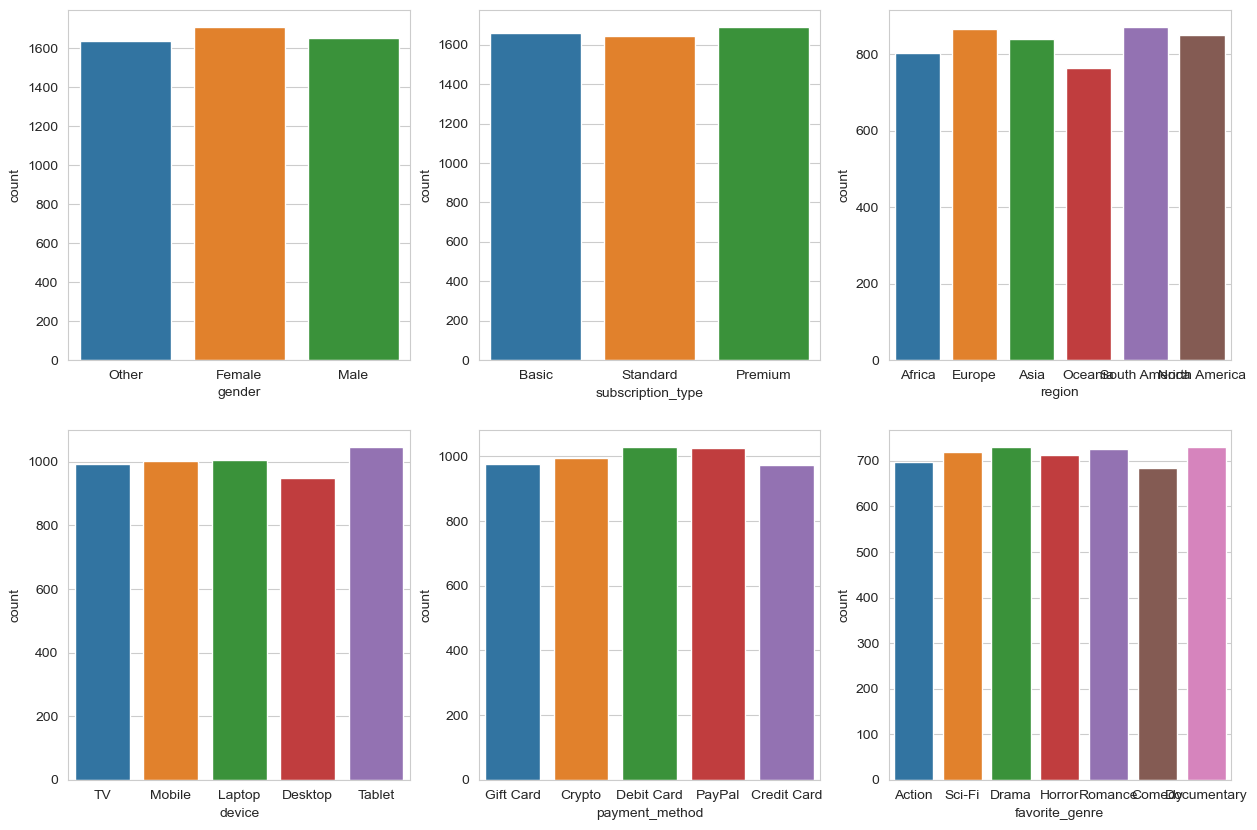

In [6]:
## Create bar charts of frequency counts by each column category

fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = df_categorical_only, x = 'gender', ax=ax1, hue='gender')

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = df_categorical_only, x = 'subscription_type', ax=ax2, hue='subscription_type')

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = df_categorical_only, x = 'region', ax=ax3, hue="region")

ax4 = fig.add_subplot(2,3,4)
sns.countplot(data = df_categorical_only, x = 'device', ax=ax4, hue="device")

ax5 = fig.add_subplot(2,3,5)
sns.countplot(data = df_categorical_only, x = 'payment_method', ax=ax5, hue="payment_method")

ax6 = fig.add_subplot(2,3,6)
sns.countplot(data = df_categorical_only, x = 'favorite_genre', ax=ax6, hue="favorite_genre")

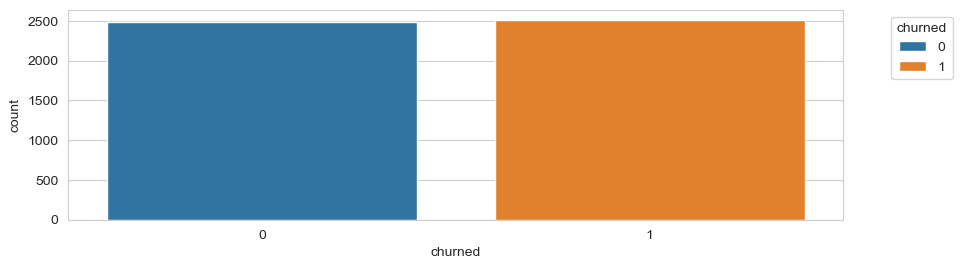

In [7]:
### Compare frequency of churn vs. non churned

fig2=plt.figure(figsize=(10,6))
ax123=fig2.add_subplot(2,1,1)

churned_only = netflix_data[["customer_id","churned"]].copy()

sns.countplot(x="churned", data=churned_only, hue="churned", ax=ax123)
sns.move_legend(ax123, "upper right", bbox_to_anchor=(1.15,1))

## Observations
- The distribution of categories across all categorical features is relatively uniform, with no single category dominating the dataset.
- None of the categorical variables exhibit excessive cardinality, reducing the need for category grouping or dimensionality reduction at this stage.
- When segmented by the binary target variable (`churned`), no category shows an extreme imbalance, suggesting that churn is not driven by a single categorical segment alone.
- The target variable itself appears well-balanced between churned and non-churned customers, which is beneficial for downstream modeling and reduces the need for resampling techniques.

In [8]:
## Numerical Variable EDA
netflix_data.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [10]:
## Numerical Variable EDA - Visualizations

netflix_numerical_columns = netflix_data.select_dtypes(include=['float64','int64']).copy()

print(netflix_numerical_columns.head())
print(netflix_numerical_columns.shape)

   age  watch_hours  last_login_days  monthly_fee  churned  \
0   51        14.73               29         8.99        1   
1   47         0.70               19        13.99        1   
2   27        16.32               10        13.99        0   
3   53         4.51               12        17.99        1   
4   56         1.89               13        13.99        1   

   number_of_profiles  avg_watch_time_per_day  
0                   1                    0.49  
1                   5                    0.03  
2                   2                    1.48  
3                   2                    0.35  
4                   2                    0.13  
(5000, 7)


<Axes: xlabel='avg_watch_time_per_day'>

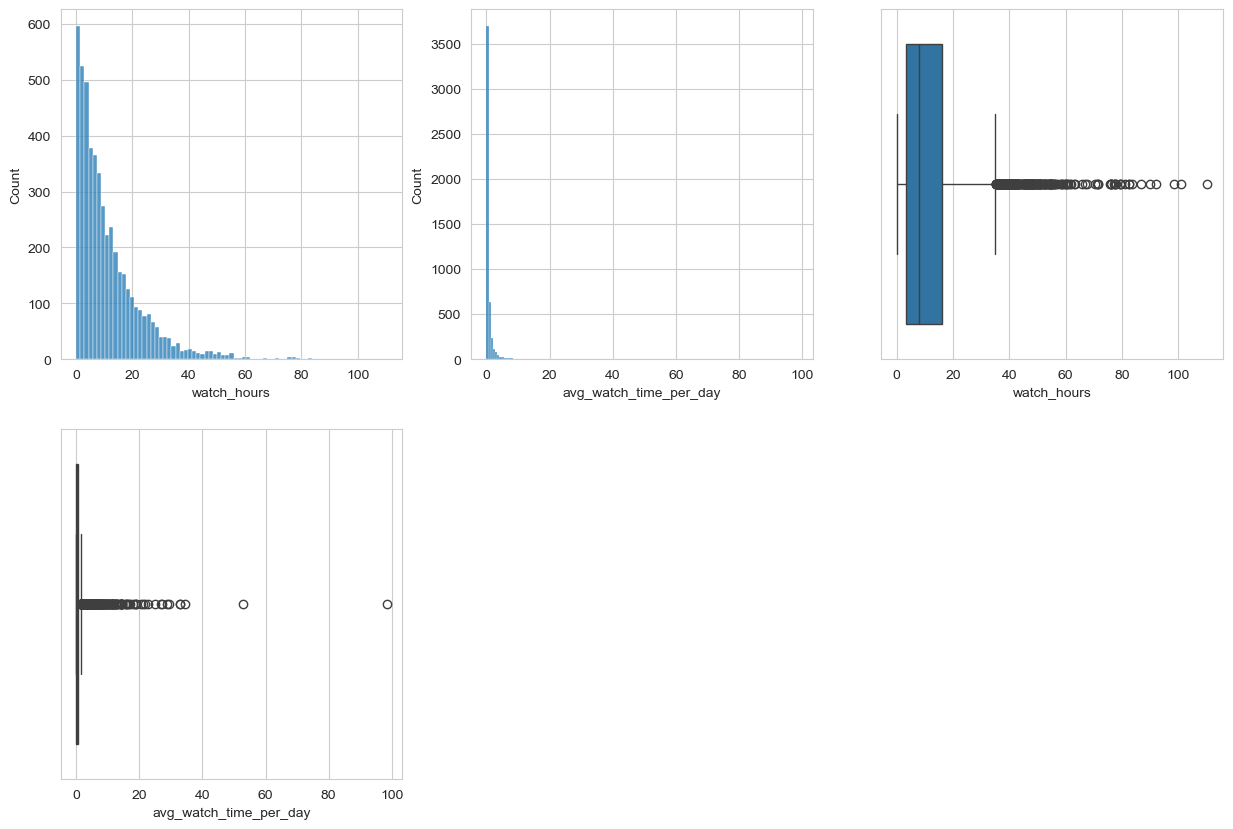

In [ ]:
# Create histograms and box & whisker plot to look at kurtosis & skewness of distribution 

figure222 = plt.figure(figsize = (15,10))
hist_ax1 = figure222.add_subplot(2,3,1)

## df_continuous_only = netflix_data.select_dtypes(include=["float64"]).copy()
df_continuous_only = netflix_data[["watch_hours", "avg_watch_time_per_day"]].copy()
## print(df_continuous_only.head())
sns.histplot(data = df_continuous_only, x = 'watch_hours', ax=hist_ax1)

hist_ax2 = figure222.add_subplot(2,3,2)
sns.histplot(data = df_continuous_only, x = 'avg_watch_time_per_day', ax=hist_ax2)

boxwhisk_ax1 = figure222.add_subplot(2,3,3)
sns.boxplot(data = df_continuous_only,x="watch_hours", ax=boxwhisk_ax1)

boxwhisk_ax2 = figure222.add_subplot(2,3,4)
sns.boxplot(data = df_continuous_only,x="avg_watch_time_per_day", ax=boxwhisk_ax2)

In [29]:
## (Numerical) Discrete variable EDA

df_discrete_only = netflix_data.select_dtypes(include=['int64']).copy()

print(df_discrete_only.head())

   age  last_login_days  churned  number_of_profiles
0   51               29        1                   1
1   47               19        1                   5
2   27               10        0                   2
3   53               12        1                   2
4   56               13        1                   2


## Observations 
- `watch_hours` and `last_login_days` exhibit high variability, as their standard deviations are large relative to their means and ranges.
- Several continuous variables deviate from normality. In particular, `watch_hours` and `avg_watch_time_per_day` exhibit strong positive skewness, driven by a small number of extreme values. This can also be seen in the Histograms and Box and Whisker plots above. 
- `age`, `last_login_days` and `number_of_profiles` are bounded or discrete in nature, making a normal distribution unlikely.

## Next Steps
Based on the initial exploration, the next phases of the analysis will be separated into their own Jupyter notebooks and will focus on:
- Further EDA of discrete numerical variables, including visualizations
    - Investigate distributions, skewness, and potential outliers
- Feature engineering
- Preparing the dataset for model training